# Will John play tennis?

In this first example we will use the example from the video and try to predict if John will play tennis on a particular day? We will use scikit-learn to build the decision tree. We will visualize the tree using Pydotplus and Graphviz. Graphviz is a tool for drawing graphics using dot files. Pydotplus is a module to Graphviz’s Dot language.

First install Graphviz and Pydotplus:

1. Download Graphviz and Install https://graphviz.gitlab.io/_pages/Download/Download_windows.html


2. !pip install graphviz<br>
   !pip install pydotplus


3. Add the graphviz installed path (C:...\graphviz\bin) to Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit > New


4. Very Important: Restart your Jupyter Notebook/machine.

In [15]:
!pip install graphviz
!pip install pydotplus

## 1. Import packages and classes

The first step is to import the packages:

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## 2. Provide the data

The second step is defining the data to work with. Below you will find the data from the example in Excel-format. We will load the data, build the tree and at the end, we will try to predict if John will play tennis on a rainy day with high humidity and weak wind.

<img src="./resources/tennis.png" style="height: 300px"/>

Let's import the data using pandas:

In [2]:
# load dataset
tennis_df = pd.read_csv("resources/tennis1.csv", sep=';')

We can then print the imported values:

In [3]:
print(tennis_df)

    day   outlook humidity    wind play
0    d1     sunny     high    weak   no
1    d2     sunny     high  strong   no
2    d3  overcast     high    weak  yes
3    d4      rain     high    weak  yes
4    d5      rain   normal    weak  yes
5    d6      rain   normal  strong   no
6    d7  overcast   normal  strong  yes
7    d8     sunny     high    weak   no
8    d9     sunny   normal    weak  yes
9   d10      rain   normal    weak  yes
10  d11     sunny   normal  strong  yes
11  d12  overcast     high  strong  yes
12  d13  overcast   normal    weak  yes
13  d14      rain     high  strong   no


## 3. Split the data

Given input features: *outlook, humidity and wind* we will predict if John will *play* or not. Let's split the features and the target variable:

In [4]:
# split dataset in features and target variable

feature_cols = ['outlook', 'humidity', 'wind']

X = tennis_df[feature_cols]
y = tennis_df[['play']] # target variable

In [5]:
print(X)

     outlook humidity    wind
0      sunny     high    weak
1      sunny     high  strong
2   overcast     high    weak
3       rain     high    weak
4       rain   normal    weak
5       rain   normal  strong
6   overcast   normal  strong
7      sunny     high    weak
8      sunny   normal    weak
9       rain   normal    weak
10     sunny   normal  strong
11  overcast     high  strong
12  overcast   normal    weak
13      rain     high  strong


In [6]:
print(y)

   play
0    no
1    no
2   yes
3   yes
4   yes
5    no
6   yes
7    no
8   yes
9   yes
10  yes
11  yes
12  yes
13   no


## 4. Train the classifier

The next step is to train the classifier (decision tree) with the data. As you know, training is always necessary for supervised learning algorithms.

In [7]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

ValueError: could not convert string to float: 'sunny'

When you run the code above, you should get the following error:

```
ValueError: could not convert string to float: 'sunny'
```

The decision trees implemented in scikit-learn uses only numerical features and these features are interpreted always as continuous numeric variables. *sunny, overcast and rain* are categorical features and they are not supported in scikit-learn.

The simpliest way to solve this, is to replace our categorical string values with numerical values. But, simply replacing the strings with numbers normally should be avoided. Because being considered as a continuous numerical feature, any coding you  use, will induce an order which simply does not exist in your data.

For example coding ['sunny', 'overcast', 'rain'] with [1, 2, 3], would produce weird things like 'sunny' is lower than 'overcast', and if you average a 'sunny' and a 'rain' you will get a 'overcast'.

But since it is the simpliest solution, we are going to do it anyway. You can always search the internet for better solutions.

So let's install `category_encoders` to replace the categories with numeric values.

In [8]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 4.0 MB/s eta 0:00:011
     |████████████████████████████████| 231 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 9.0 MB/s eta 0:00:01     |██████████████████████████████▏ | 8.9 MB 9.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
print(X)

     outlook humidity    wind
0      sunny     high    weak
1      sunny     high  strong
2   overcast     high    weak
3       rain     high    weak
4       rain   normal    weak
5       rain   normal  strong
6   overcast   normal  strong
7      sunny     high    weak
8      sunny   normal    weak
9       rain   normal    weak
10     sunny   normal  strong
11  overcast     high  strong
12  overcast   normal    weak
13      rain     high  strong


In [10]:
print(feature_cols)

['outlook', 'humidity', 'wind']


In [11]:
import category_encoders as ce

ce_ord = ce.OrdinalEncoder(cols = feature_cols)
X_cat = ce_ord.fit_transform(X)

/home/yori/Documents/School/3ITF/AI/envs/AI/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [12]:
print(X_cat)

    outlook  humidity  wind
0         1         1     1
1         1         1     2
2         2         1     1
3         3         1     1
4         3         2     1
5         3         2     2
6         2         2     2
7         1         1     1
8         1         2     1
9         3         2     1
10        1         2     2
11        2         1     2
12        2         2     1
13        3         1     2


Now we can try to train the classifier (decision tree) with the data.

In [13]:
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_cat, y)

## 5. Visualize the decision tree

Now we can use the packages from above (graphviz and pydotplus) to visualize our decision tree.

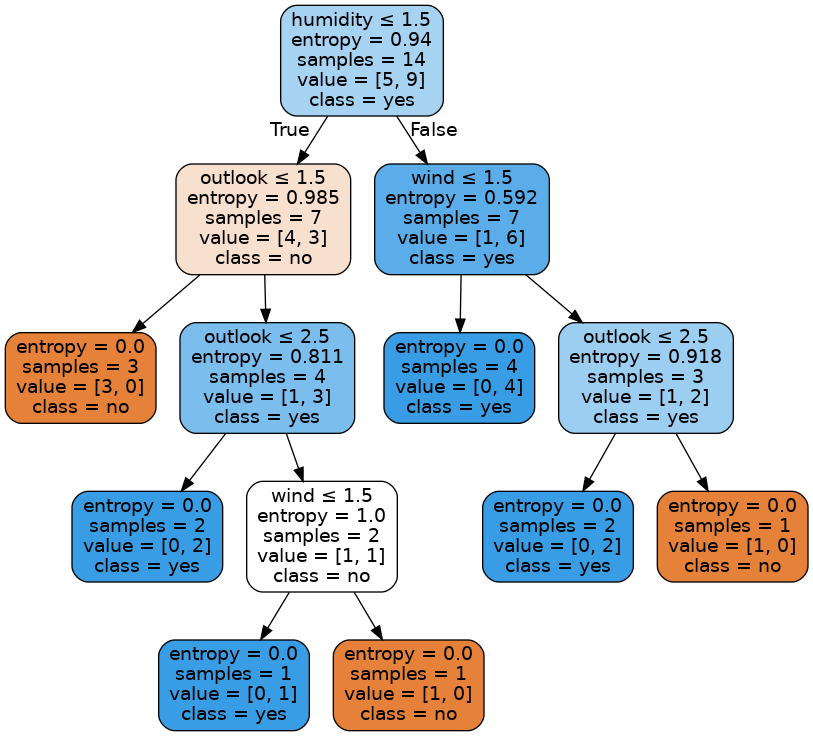

In [20]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 550)

Remarks:
    
- The algorithm keeps generating levels until the datasets are pure (entropy = 0).
- Since scikit-learn works with continuous values, the conditions in the nodes are formulated as `feature <= some_other_value` with only two outcomes (true or false). In our example we had categorical values: *Outlook is sunny, overcast or rain*.

## 6. Make predictions - Exercise

We wanted to predict if John would play tennis on a rainy day with high humidity and weak wind. Can you first convert the features in number values and use the tree above to determine if John will play tennis?

In [ ]:
# answer?
# [outlook, humidity, wind] = [ , , ]
# Will John play tennis? YES / NO

You can check yourself if your prediction was right.

In [18]:
prediction = clf.predict([[3, 1, 1]])                                         
print(prediction)  

['yes']


## 7. An extra feature temperature - Exercise

In the resources you will find a file tennis2.csv with an extra feature. Can you use this file and predict if John will still  play tennis on a HOT rainy day with high humidity and weak wind?

In [21]:
# load dataset
tennis_df = pd.read_csv("resources/tennis2.csv", sep=';')

In [22]:
# print dataset
print(tennis_df)

    day   outlook  temp humidity    wind play
0    d1     sunny  mild     high    weak   no
1    d2     sunny  cool     high  strong  yes
2    d3  overcast   hot     high    weak  yes
3    d4      rain  mild     high    weak  yes
4    d5      rain  cool   normal    weak  yes
5    d6      rain  cool   normal  strong   no
6    d7  overcast  cool   normal  strong  yes
7    d8     sunny  mild     high    weak   no
8    d9     sunny  cool   normal    weak  yes
9   d10      rain  mild   normal    weak  yes
10  d11     sunny  mild   normal  strong  yes
11  d12  overcast  mild     high  strong  yes
12  d13  overcast   hot   normal    weak  yes
13  d14      rain  mild     high  strong   no


In [24]:
# split dataset in features and target variable
feature_cols = ['outlook', 'humidity', 'wind', 'play']

X = tennis_df[feature_cols]
y = tennis_df[['play']] # target variable

In [25]:
# encode the categories
import category_encoders as ce

ce_ord = ce.OrdinalEncoder(cols = feature_cols)
X_cat = ce_ord.fit_transform(X)

/home/yori/Documents/School/3ITF/AI/envs/AI/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [26]:
# print the encoded categories
print(X_cat)

    outlook  humidity  wind  play
0         1         1     1     1
1         1         1     2     2
2         2         1     1     2
3         3         1     1     2
4         3         2     1     2
5         3         2     2     1
6         2         2     2     2
7         1         1     1     1
8         1         2     1     2
9         3         2     1     2
10        1         2     2     2
11        2         1     2     2
12        2         2     1     2
13        3         1     2     1


In [27]:
# fit the classifier
clf = DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X_cat, y)

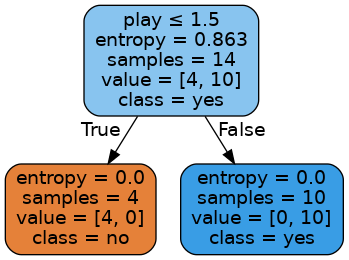

In [28]:
# print the decision tree
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width = 550)

In [31]:
# make prediction
prediction = clf.predict([[3, 1, 1, 0]])                                         
print(prediction)  

['no']


In [ ]:
# Will John still play tennis on a HOT rainy day with high humidity and weak wind?
# answer